In [23]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat

In [24]:
with open('Data/Aufgabe_3.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T

data = f.channel_to_pos(data,cal)

In [25]:
yerr = 0.035339825186025027*np.abs(data[1])

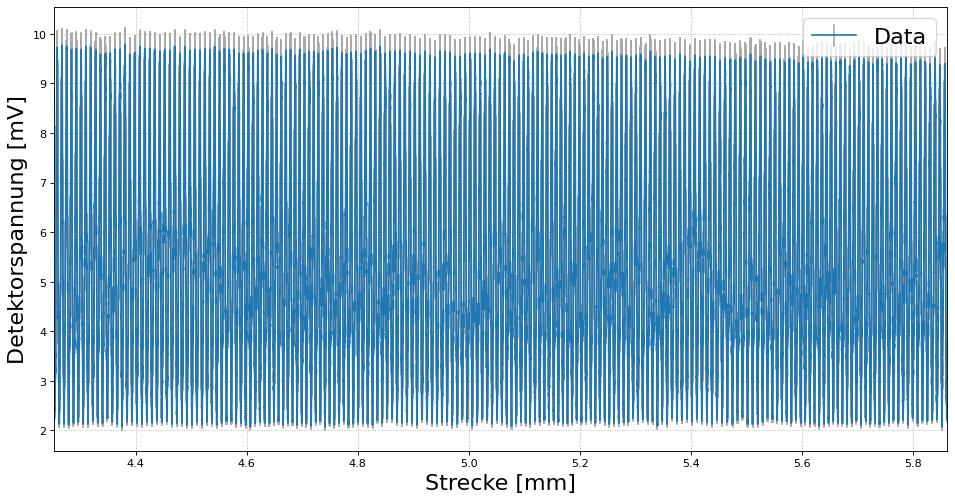

In [26]:
f.figsize(2)
plt.errorbar(data[0],data[1],yerr=yerr,label = 'Data',ecolor='darkgray')

f.form([4.2532,5.8615],xlabel='Strecke [mm]',ylabel='Detektorspannung [mV]',name='Res/A3_interferogramm.pdf')

Wavelength: 3.3327089625593403e-06 m


/tmp/ipykernel_4489/2368014271.py:22: RuntimeWarning: divide by zero encountered in divide
  freqs = 1/freqs


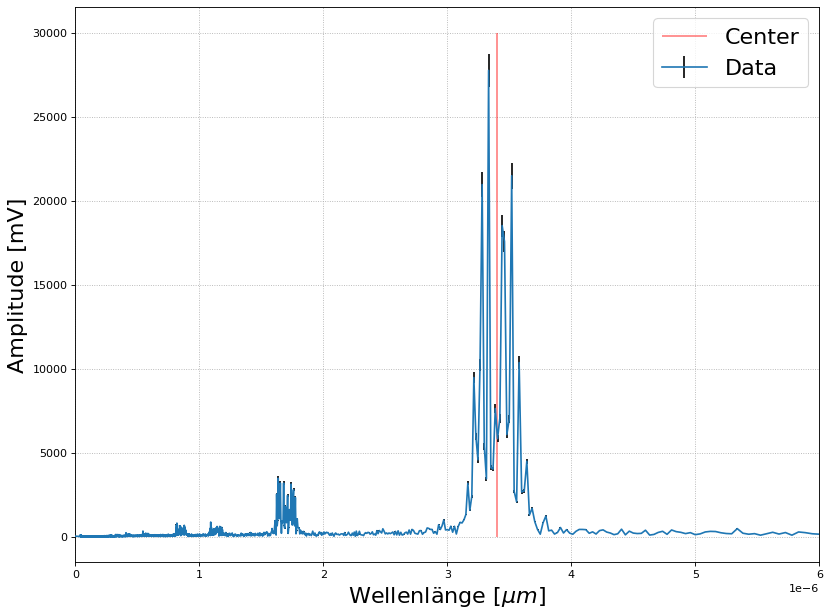

In [27]:
freq_scale = 2/5.127868608985219*1e-3

intensity = data[1]
position  = data[0]*freq_scale


intensity -= np.mean(intensity)


freqs = np.fft.fftfreq(len(intensity), d=((np.mean(np.diff(position)))))
fft_int = np.fft.fft(intensity)
fft_err = np.fft.fft(yerr)


peak_idx = np.argmax(np.abs(fft_int))
peak_freq = freqs[peak_idx]

#plt.style.use('seaborn-v0_8-darkgrid')

print(f"Wavelength: {1/peak_freq} m")

freqs = 1/freqs

f.figsize(1)

plt.errorbar(freqs, np.abs(fft_int),yerr=np.abs(fft_err),ecolor='k',zorder=10,label='Data')
plt.xlim(0,0.6e-5)
plt.vlines(3.4032e-06,0,30000,colors="r",zorder=5,alpha = 0.5,label='Center')
f.form(xlabel=f'Wellenlänge [$\mu m$]',ylabel='Amplitude [mV]')

In [28]:
dat = [freqs, np.abs(fft_int),np.abs(fft_err)]

sorted_indices = sorted(range(len(dat[0])), key=lambda k: dat[0][k])

dat_sorted = [[dat[0][i], dat[1][i],dat[2][i]] for i in sorted_indices]

dat_sorted = np.array(dat_sorted).T

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 189
    # variables        = 3
    chi-square         = 124421.475
    reduced chi-square = 668.932663
    Akaike info crit   = 1232.55010
    Bayesian info crit = 1242.27534
    R-squared          = 0.99995381
[[Variables]]
    amplitude:  0.00198829 +/- 4.0845e-04 (20.54%) (init = 0.00990975)
    center:     3.4032e-06 +/- 1.3043e-08 (0.38%) (init = 3.407021e-06)
    sigma:      1.4121e-07 +/- 9.2546e-09 (6.55%) (init = 1.191292e-07)
    fwhm:       3.3251e-07 +/- 2.1793e-08 (6.55%) == '2.3548200*sigma'
    height:     5617.44432 +/- 1415.34854 (25.20%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = -0.631
    C(center, sigma)    = 0.102


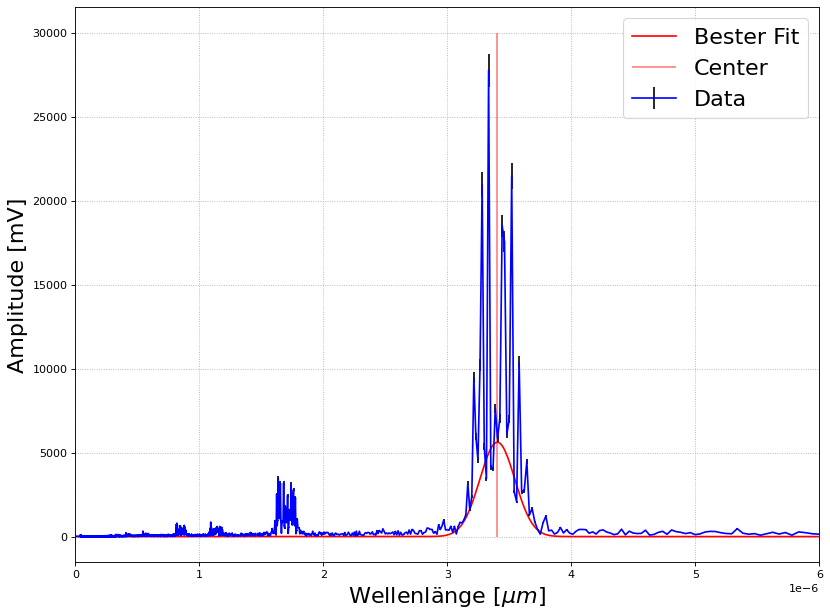

In [29]:
von,bis = f.pos(dat_sorted[0],0.2e-5),f.pos(dat_sorted[0],0.5e-5)

fillerr = np.full(len(dat_sorted[0,von:bis]),1)

res = f.gausfit(dat_sorted[1,von:bis],dat_sorted[0,von:bis],dat_sorted[2,von:bis])


print(res.fit_report())

f.figsize(1)



plt.errorbar(freqs, np.abs(fft_int),yerr=np.abs(fft_err),ecolor='k',zorder=10,label='Data',fmt='b')
plt.plot(np.arange(0,6e-6,1e-8),res.eval(x=np.arange(0,6e-6,1e-8)),color='r',label='Bester Fit')
plt.xlim(0,0.6e-5)
plt.vlines(3.4032e-06,0,30000,colors="r",zorder=5,alpha = 0.5,label='Center')
f.form(xlabel=f'Wellenlänge [$\mu m$]',ylabel='Amplitude [mV]',name='Res/A3_fftfit.pdf')